# The results of `varbvs` result and `logitBvs` 

## Previous simulation
Simulation [link](https://github.com/gaow/cnv-gene-mapping/blob/master/dsc/20190819_workflow_report.ipynb)

## `varbvs` results comparison with real `beta

Simulated $\beta$'s (22356)
1. $\mu$: 1
2. sd: 0.5
3. $\pi$: 0.05

`varbvs`: "Averaged" posterior mean regression coefficients
1. $\mu$: 0.777
2. sd: 0.84365
3. $\pi$: 0.043775

## `logitBvs` result
`logitBvs` [link](https://rdrr.io/cran/pogit/man/logitBvs.html): Bayesian variable selection for the binomial logit model.

We use `logitBvs` to perform MCMC sampling.

`logitBvs` function and arguments
```
mu0 = 0.777; var = 0.84365^2  ## (varbvs result)
## To fit pi (0.0437): set beta distribution alpha = 1.412, beta = 10, highest density around 0.043
res = logitBvs(y, N, X, prior = list(slab = "Normal", aj0 = rep(mu0, ncol(X)-1), V = var, w = c(wa0 = 1, wb0 = 1), pi = c(pa0 = 1.412, pb0 = 10)), 
               mcmc = list(M = 10000, burnin = 2000, msave = TRUE), BVS = FALSE)
```

### Arguments
1. centering: deal with intercept, does not make any difference with centering
2. 2 weight mean wa0 and wb0: paper [link](https://journals.sagepub.com/doi/pdf/10.1177/1471082X15588398) $\omega_{\beta}$
3. PIP: as long as `aj0` is not default (0), PIP does not show.

Two natural blocks were selected for MCMC. For each block, compute Pearson correlation $X*\hat{\beta}$ and $X*\beta_{simu}$
1. `block_1215_1273`: correlation $0.3251993$
2. `block_164_177`: correlation $0.9919708$

### The histogram of $\beta$ in `block_164_177`

> /home/min/GIT/cnv-gene-mapping/data/deletion_simu/logitBvs.block_23_36.var.selection.beta.hist.pdf (16.2 KiB):

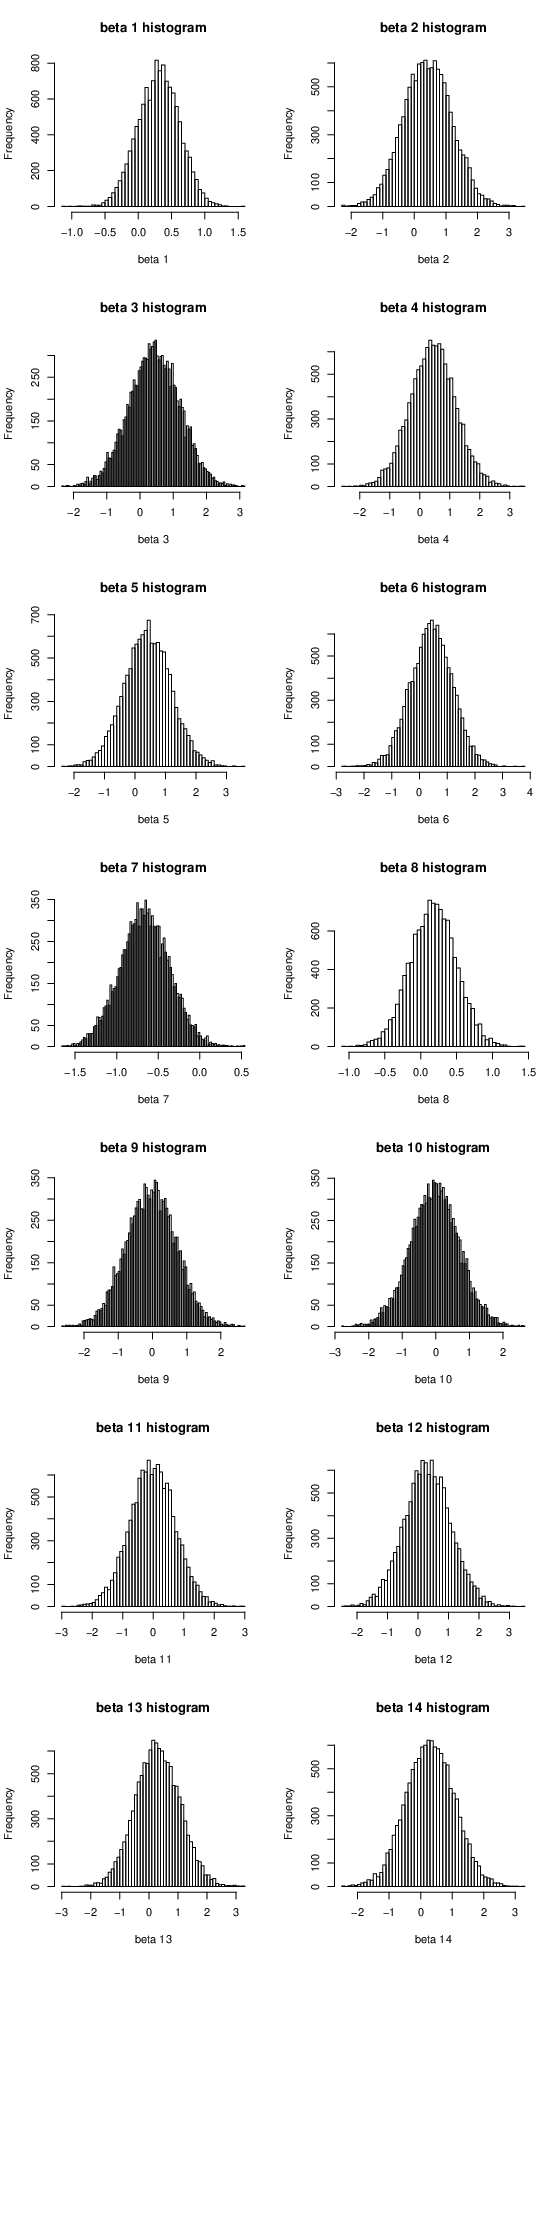

In [11]:
%preview /home/min/GIT/cnv-gene-mapping/data/deletion_simu/logitBvs.block_23_36.var.selection.beta.hist.pdf -s png --dpi 80